# 지도학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [ ]:
data = load_iris()['data']
target = load_iris()['target']
np.random.seed(42)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(data, target, random_state=42, stratify=target)

In [ ]:
ss = StandardScaler()
X_tr = ss.fit_transform(X_tr)
X_val = ss.transform(X_val)

In [ ]:
dtc = DecisionTreeClassifier()
lgr = LogisticRegression()
kn = KNeighborsClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

model_list = [dtc, lgr, kn, rfc, xgb]

for model in model_list:
  model.fit(X_tr, y_tr)
  pred = model.predict(X_val)
  print(classification_report(y_val, pred))
  print('-'*50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.81    

In [ ]:
data.shape

(150, 4)

# 전처리
```
기본적인 데이터 분석
  info, describe, hitmap
결측치 처리
  평균,중앙값, 그룹별... , 최반값
  알고리즘을 이용해서 : 보간기법
이상치 처리
  boxplot등의 시각화를 통해 가늠
  IQR, z-score 등이용
스케일링
  StandardScaler :  Z-score 평균0 표준편차 1 이상치에 약간 민감함
  MinMaxScaler : 0~1 범위로 평균화  이상치에 민감해
  RobustSclaer : 중앙값 IQR 기반 이상치에 강건
  Normalizer : 벡터 정규화(각 셈플 단위로 벡터화)
특성 선택
  도메인 기반으로 특성선택
  통계적
  머신러닝 : 트리계열을 사용하면 모델이 best_importance_
차원 축소  : 이미지나 음성 등 특성이 많은 데이터
  PCA
파이프라인으로 (선택)
  최종 적으로 전처리와 모델이 선택되면 자동화
시각화
  전저리 전후
  박스플롯 스케일일의 결과
  산점도 차원축소 및 특성 선택 결과
```

In [ ]:
df = pd.DataFrame(data = load_iris()['data'], columns=load_iris()['feature_names'])
df['class'] = load_iris()['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


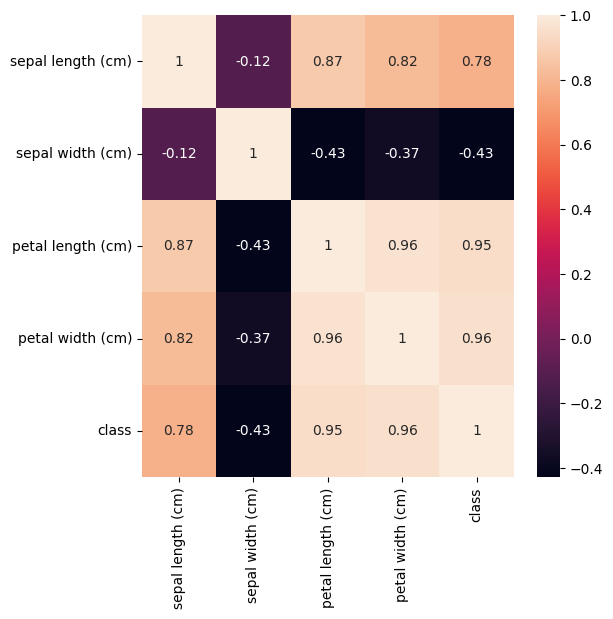

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(data = df.corr(), annot=True)
plt.show()

# 이상치 탐지

In [ ]:
# 이상치 일수록 쉽게 분할된다는 아이디어
# 무작위로 특성을 선택하고 분리해서 고립되는 데이터를 찾는
# 1이면 정상
# -1이면 이상치
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(random_state=42)
outlier = iso_forest.fit_predict(df.drop('class', axis=1))   # 전체 데이터의 10%를 이상치로 가정
outlier

array([ 1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1])

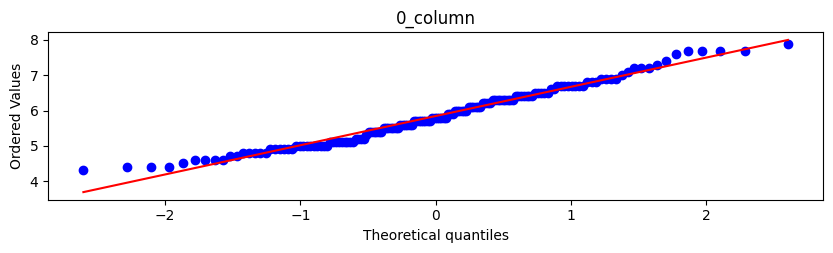

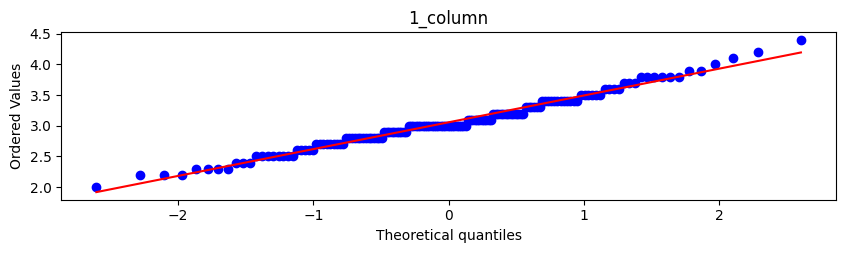

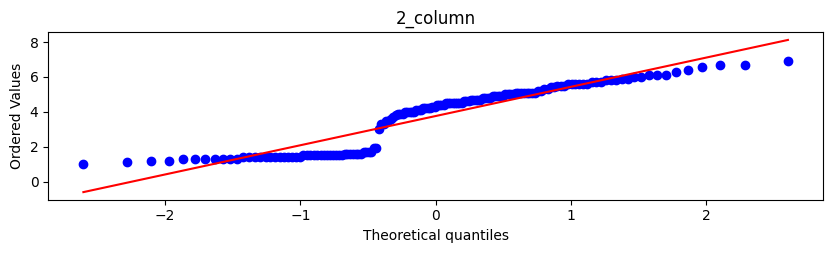

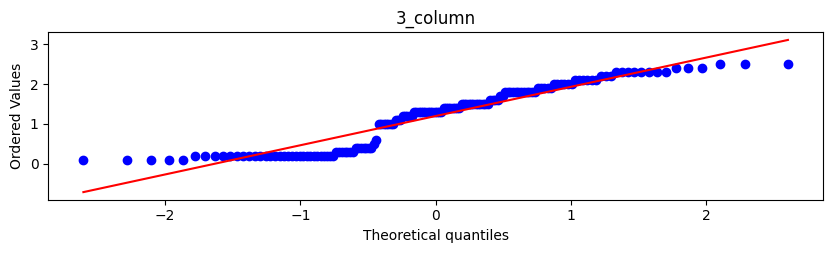

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


for i in range(4):
  plt.figure(figsize=(10,10))
  plt.subplot(4,1,i+1)
  stats.probplot(data[:,i], dist='norm', plot=plt)
  plt.title(f'{i}_column')
  plt.show()

In [ ]:
# 이상치 일수록 쉽게 분할된다는 아이디어
# 무작위로 특성을 선택하고 분리해서 고립되는 데이터를 찾는
# 1이면 정상
# -1 이상치
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 전체데이터의 10%를 이상치로 가정
outlier = iso_forest.fit_predict(df.drop('class', axis=1))
len(np.where(outlier == -1 )[0])
# 이상치 제거
df = df.iloc[np.where(outlier == 1 )[0],:]
df['class'].value_counts()

,count
class,
1,47
2,45
0,43


# 다양한 스케일링 적용후 데이터 변화 시각화

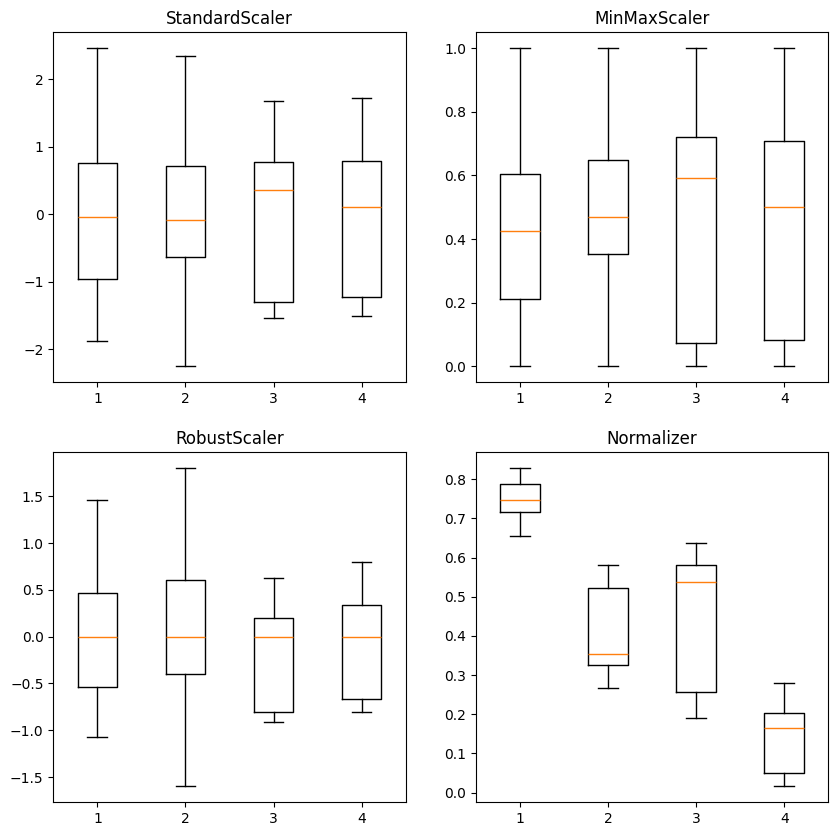

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
scaler_list = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for idx , scaler in enumerate(scaler_list):
    df_scaled = scaler.fit_transform(df.drop('class', axis=1))
    df_scaled = pd.DataFrame(df_scaled, columns=df.drop('class', axis=1).columns)
    i,j = idx//2, idx%2
    axes[i,j].set_title(scaler.__class__.__name__)
    axes[i,j].boxplot(df_scaled)

plt.show()


특성선택
```
SelectKBest : 가장유용한 특성을 선택
  통계적 점수를 기준으로 상위 k 개의 특성을 선택
  차원축소의 기능, 불필요한 특성을 제거
f_classif
  분류문제에서 특성과 타깃의 관계를 평가 ANOVA F 값을 계산
  각 특성에 대한 클래스간의 분산과 클래스내 분산을 비교 통계량
  단점 : 비선형이나 복잡한 상호작용은 반영 못함  
```

트리모델 사용

<Axes: >

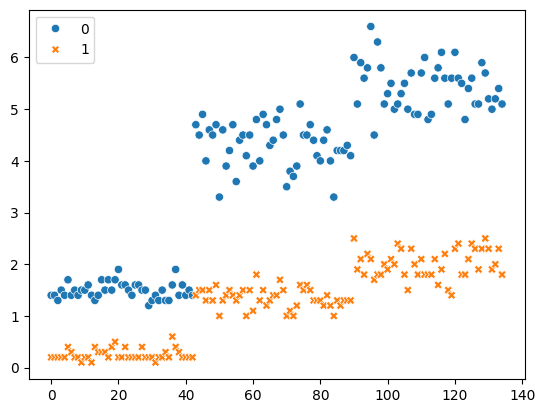

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(df.drop('class', axis=1), df['class'])
sns.scatterplot(X_selected)

#파이프라인 적용
```
각종기법이 정해져 잇어야함
전처리
  스케일링
  이상치
  결측칙
  차원축소 또는 중요피쳐선택
모델
```

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=2)),
    ('model', LinearRegression())
])

# 파이프라인 학습
pipeline.fit(X_tr, y_tr)
# 평가
pipeline.score(X_val, y_val)

0.9006047298750876

# 앙상블
```
여러모델이 합쳐져서 하나의 모델로 동작
평균
투표
작은모델들이 서로 협력해서 학습 - 스태킹
```

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df['class'] = load_iris().target

X = df.drop('class',axis=1)
y = df['class']
X_tr, X_val, y_tr, y_val = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report



rfc = RandomForestClassifier(random_state=42)
gbc= GradientBoostingClassifier(random_state=42)

base_estimators = [('rf', rfc), ('gb', gbc)]

vtc = VotingClassifier(estimators=base_estimators, voting='soft')
sc = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())
models=[rfc, gbc, vtc, sc]

for model in models:
  model.fit(X_tr,y_tr)
  pred = model.predict(X_val)
  print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy        

# 단일신경망

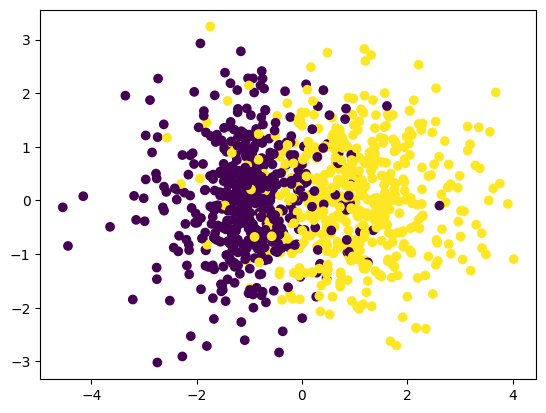

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, class_sep=1.0, flip_y=0.0,  random_state=42)
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, y.shape, np.unique(y)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
import tensorflow as tf

input = tf.keras.layers.Input(shape=(10,))
output = tf.keras.layers.Dense(1, activation='sigmoid')(input)
model_api = tf.keras.Model(inputs = input, outputs = output)
model.fit

<bound method StackingClassifier.fit of StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())>

In [ ]:
import tensorflow as tf
input = tf.keras.layers.Input(shape=(10,))
output = tf.keras.layers.Dense(1, activation='sigmoid')(input)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))
model.evaluate(X_test, y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3598 - loss: 1.0848 - val_accuracy: 0.3450 - val_loss: 1.0409
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3552 - loss: 1.0716 - val_accuracy: 0.3500 - val_loss: 1.0085
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3509 - loss: 1.0529 - val_accuracy: 0.3550 - val_loss: 0.9772
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3766 - loss: 0.9696 - val_accuracy: 0.3700 - val_loss: 0.9475
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4069 - loss: 0.9435 - val_accuracy: 0.3800 - val_loss: 0.9189
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3963 - loss: 0.9137 - val_accuracy: 0.4100 - val_loss: 0.8908
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3830 - loss: 0.9154 - val_accuracy: 0.4350 - val_loss: 0.8642
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3995 - loss: 0.8851 - val_accuracy: 0.44

[0.3597770929336548, 0.8650000095367432]

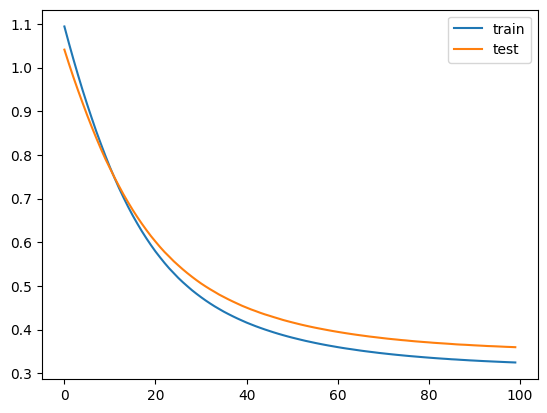

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8665 - loss: 0.3434 
[0.3597770929336548, 0.8650000095367432]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
print(model.evaluate(X_test, y_test))

라이브러리를 사용하지 않고 직접 구현
```
손실함수
값을예측
기울기 업데이트
활성화함수 시그모이드
```

In [ ]:
import numpy as np
class ANN:
  def __init__(self, input_size, lr = 0.01, epochs=100):
    self.weights = np.random.rand(input_size)   #  vudrbsdl 0 표준편차1의 정규분포에서 랜덤값을 생성
    self.bias = np.random.rand(1)
    self.input_size = input_size
    self.lr = lr
    self.epochs = epochs

  def sigmoid(self, X):
    return 1/(1+np.exp(-X))

  def forward(self, x):
    return self.sigmoid(np.dot(x,self.weights) + self.bias)

  def train(self,X,y):
      for epoch in range(self.epochs):
        for i in range(len(X)):  # 확률적 경사하강법 - 훈련데이터를 하나씩 꺼내서 학습
          # 순전파
          output = self.forward(X[i])
          # 오차 계산
          error = y[i] - output
          # error를 곱해서 기울기를 계산
          gradient = error * output * (1 - output)  # output * (1 - output) 시그모이드 함수의 함수미분 - 도함수
          # 가중치 업데이트
          self.weights += self.lr * gradient * X[i]
          self.bias += self.lr * gradient

ann = ANN(input_size=10)
ann.train(X_train, y_train)
ann_predict = ann.forward(X_test)
from sklearn.metrics import accuracy_score
# ann_predict > 0.5  확률로 계산되기 때문에 threshold값을 0.5로 해서 크면 True
accuracy_score(y_test, ann_predict > 0.5)

0.86

복합 신경망

다중분류 데이터 만들기

In [ ]:
# CNN
import tensorflow as tf

# tensorflow 이용한 멀티 레이어
X_train.shape[1]
input = tf.keras.layers.Input(shape=(X_train.shape[1],))
hidden = tf.keras.layers.Dense(10, activation='relu')(input)
hidden = tf.keras.layers.Dense(5, activation='relu')(hidden)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))
model.evaluate(X_test, y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5564 - loss: 0.6741 - val_accuracy: 0.6500 - val_loss: 0.6222
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5983 - loss: 0.6447 - val_accuracy: 0.7000 - val_loss: 0.5928
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6647 - loss: 0.5921 - val_accuracy: 0.7350 - val_loss: 0.5645
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7339 - loss: 0.5561 - val_accuracy: 0.7850 - val_loss: 0.5360
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7509 - loss: 0.5448 - val_accuracy: 0.7900 - val_loss: 0.5064
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8185 - loss: 0.4925 - val_accuracy: 0.8300 - val_loss: 0.4791
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8390 - loss: 0.4564 - val_accuracy: 0.8400 - val_loss: 0.4562
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8477 - loss: 0.4160 - val_accuracy: 0.8450 - 

[0.3554018437862396, 0.8399999737739563]

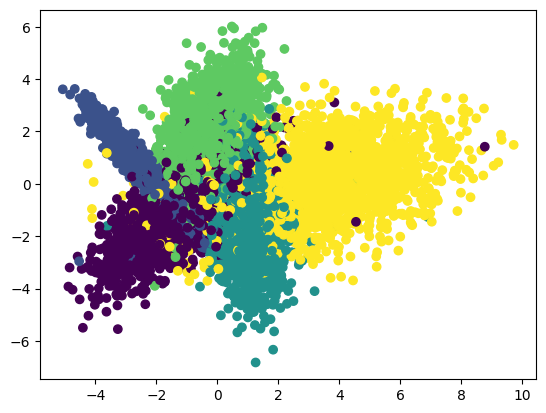

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X, y = make_classification(n_samples=10000, n_features=10, n_clusters_per_class = 1,class_sep=1.0
                           ,n_informative=3, n_classes=5,random_state=42)
# feature를 2개로
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
# 데이터는 분류중에 클래스가 여러개인 데이터를 생성

# tensorflow 이용한 멀티 레이어
X_train.shape[1]
class_num = len(np.unique(y_train))
print(class_num)
input = tf.keras.layers.Input(shape=(X_train.shape[1],))
hidden = tf.keras.layers.Dense(20, activation='relu')(input)
hidden = tf.keras.layers.Dense(10, activation='relu')(hidden)
output = tf.keras.layers.Dense(class_num, activation='softmax')(hidden)
model = tf.keras.Model(inputs=input, outputs=output)
model.summary()
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy , metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))
model.evaluate(X_test, y_test)

5


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 325 (1.27 KB)

 Trainable params: 325 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4083 - loss: 1.4525 - val_accuracy: 0.7340 - val_loss: 0.8792
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7611 - loss: 0.7873 - val_accuracy: 0.7660 - val_loss: 0.6242
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.6029 - val_accuracy: 0.7795 - val_loss: 0.5791
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.5960 - val_accuracy: 0.7820 - val_loss: 0.5683
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8002 - loss: 0.5701 - val_accuracy: 0.7850 - val_loss: 0.5635
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7888 - loss: 0.5848 - val_accuracy: 0.7920 - val_loss: 0.5597
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7935 - loss: 0.5603 - val_accuracy: 0.7950 - val_loss: 0.5563
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.5580 - val_accu

[0.5236630439758301, 0.8040000200271606]

# CNN

In [ ]:
from glob import glob
import tensorflow as tf
data_dir = '/content/drive/MyDrive/data/dogcat'
data = glob(str(data_dir)+'/**/*.jpg', recursive=True)

In [ ]:
# !pip install opencv-python
data_list = []
import cv2
for i in range(len(data)):
  img = cv2.imread(data[i])    # 이미지 읽기(수치화)
  img = cv2.resize(img,(256,256))  # 사이즈 조정
  img = img.flatten() / 255.0      #  0 ~ 1 스케일링
  data_list.append(img)

KeyboardInterrupt: 

In [ ]:
y = [0] *400 + [1]*400

In [ ]:
input = tf.keras.layers.Input(shape=(256,256,3))
hidden = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(input)
hidden = tf.keras.layers.MaxPooling2D((2,2))(hidden)
hidden = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(hidden)
hidden = tf.keras.layers.MaxPooling2D((2,2))(hidden)
hidden = tf.keras.layers.Flatten()(hidden)
hidden = tf.keras.layers.Dense(10, activation='relu')(hidden)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │       1,230,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,357 (4.77 MB)

 Trainable params: 1,250,357 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_ds_scaled_autotune, epochs=10, validation_data=test_ds_scaled_autotune)

# RNN

In [ ]:
import pandas as pd
train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
test_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"

train_df = pd.read_csv(train_url, sep='\t')
test_df = pd.read_csv(test_url, sep='\t')
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df.shape, test_df.shape


((149995, 3), (49997, 3))

전처리
```
한글만 추출
문장에서 형태소(의미있는 가장 작은 단위) 분석 : 각각의 품사를 분석
명사 조사 동사 과거 어미 마침표
분석기 Okt  패키지 konlpy  
```  

In [ ]:
# 한글하고 공백만 남기고 제거 정규표현식
!pip install konlpy -q
import re
from konlpy.tag import Okt
def preprocess_text(text):
  text = re.sub(r'[^가-힣\s]', '', text)
  okt = Okt()
  tokens = okt.morphs(text)
  return ' '.join(okt.morphs(text))

# 사용 예
train_df['document'][0], preprocess_text(train_df['document'][0])

('아 더빙.. 진짜 짜증나네요 목소리', '아 더빙 진짜 짜증나네요 목소리')

시퀀스변환
```
서로다른 문장의 길이를
학습을 위해서 통일
긴 문장은 자르고 짧은 문장은 패딩(0)으로 채운다.
```

In [ ]:
# 토큰화 및 패딩
import tensorflow as tf
def tokenizer_padding(X_train, X_test,max_length = 100):
  '''
    파라메터는 2차원
    리턴값은 패딩된 train, test, 단어사전개수
  '''
  tokenizer = tf.keras.preprocessing.text.Tokenizer()
  tokenizer.fit_on_texts(X_train)

  # 정수 인코딩
  X_train_sequence = tokenizer.texts_to_sequences(X_train)
  X_test_sequence = tokenizer.texts_to_sequences(X_test)

  # 패딩
  X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequence,maxlen=max_length)
  X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequence,maxlen=max_length)

  # 단어사전의 개수
  return X_train_pad, X_test_pad

In [ ]:
# 하이퍼 파라메터 생성
embedding_dim = 16
max_length = 100
vocab_size = 500
def create_model(embedding_dim = 16, max_length = 100,vocab_size = 500):
  input = tf.keras.layers.Input(shape=(max_length,))
  hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input)
  hidden = tf.keras.layers.SimpleRNN(64, return_sequences = True)(hidden)  # 다음 Rnn 모델을 위해서 시퀀스차원을 유지
  hidden = tf.keras.layers.SimpleRNN(32)(hidden)
  # RNN은 Flatten이 필요 없음
  hidden = tf.keras.layers.Dense(10, activation='relu')(hidden)
  output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
  model = tf.keras.Model(inputs=input, outputs=output)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
train_df['document'] = train_df['document'].apply(preprocess_text)
test_df['document'] = test_df['document'].apply(preprocess_text)

In [ ]:
X_train_pad, X_test_pad = tokenizer_padding(train_df, test_df)

In [ ]:
model = create_model()
model.fit(X_train_pad, X_test_pad)